## Code to generate Figure 2E graphics
For each peptide simulation, we calculated the trajectory-averaged interresidue distances for the unmodified and phosphorylated sequences using soursop and stored them as csv files. This code calculates distance difference maps between apo and phosphorylated simulations for each WT or mutant. In the distance calculations, data points for distances between i and j when i = j are excluded.

This code loads csv files from 'data/'.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
## load csv files with dssp from replicates ##
# 'reps' indicates the data are organized per-replicate (instead of merged)

aTH4 = np.loadtxt('data/aTH4_dm.csv')
aD784A = np.loadtxt('data/aTH4_D784A_dm.csv')
aR790V = np.loadtxt('data/aTH4_R790V_dm.csv')
pTH4 = np.loadtxt('data/pTH4_dm.csv')
pD784A = np.loadtxt('data/pTH4_D784A_dm.csv')
pR790V = np.loadtxt('data/pTH4_R790V_dm.csv')

In [10]:
## function to generate difference distance map data & account for NaN values##
# minuend == the final condition (i.e., phosphorylated distance map)
# subtrahend == the initial condition (i.e., unphosphorylated distance map)

def dist_diff(minuend, subtrahend):
    diffmap = minuend - subtrahend
    diffmap_num = np.nan_to_num(diffmap, nan = 0)
    diffmapT = diffmap_num.transpose()
    masked_array = np.ma.masked_where(diffmapT == 0, diffmapT)
    
    return masked_array

In [17]:
## use above function to calculate difference distance maps (ddm) to be plotted ##

WT_ddm = dist_diff(pTH4, aTH4)
R790V_ddm = dist_diff(pR790V, aR790V)
D784A_ddm = dist_diff(pD784A, aD784A)

mutants = [WT_ddm, R790V_ddm, D784A_ddm]

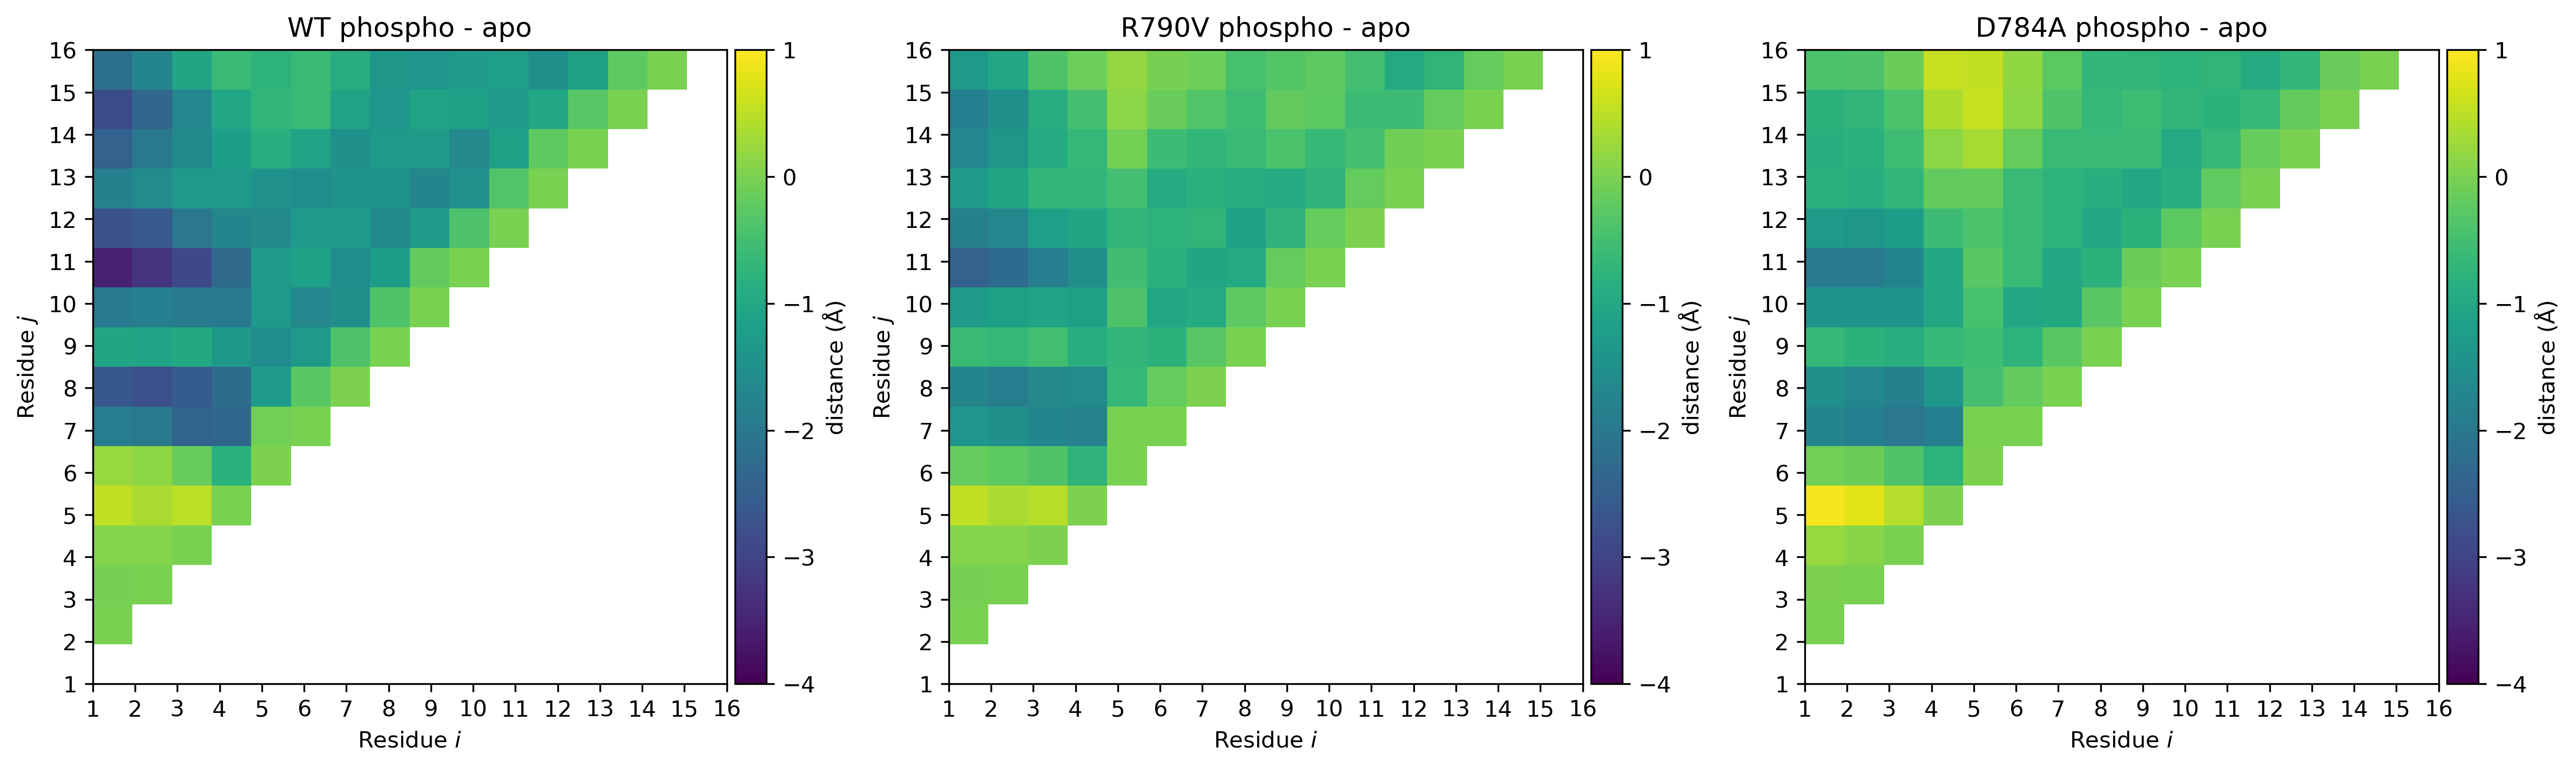

In [28]:
## generate difference distance map graphics (PANEL E) ##

fig, axes = plt.subplots(1, 3, figsize = (16, 5), dpi = 300)

titles = ['WT', 'R790V', 'D784A']

# set up colormap #
cmap = copy.copy(cm.get_cmap("viridis"))

for x in range(3):
    max_extent = mutants[x].shape[0]
    im = axes[x].imshow(mutants[x], cmap = cmap, interpolation = None, origin = 'lower', 
                 extent = [1, max_extent, 1, max_extent], vmax = 1, vmin = -4)
    axes[x].set_ylabel('Residue $j$')
    axes[x].set_xlabel('Residue $i$')
    axes[x].set_xticks(np.arange(0, max_extent+1, 1), fontsize = 10)
    axes[x].set_yticks(np.arange(0, max_extent+1, 1), fontsize = 10)
    axes[x].set_xlim([1, max_extent])
    axes[x].set_ylim([1, max_extent])
    axes[x].set_title(str(titles[x])+ ' phospho - apo')
    
    divider = make_axes_locatable(axes[x])
    cax = divider.append_axes("right", size = "5%", pad = 0.05)
    cb = fig.colorbar(im, cax = cax)
    cb.set_label('distance (Å)')

plt.tight_layout()

plt.savefig('TH4_distance_maps_2E.pdf', format = 'pdf', dpi = 300)

plt.show()